<a href="https://colab.research.google.com/github/Chhavinder058/CAPSTONE/blob/main/Capstone_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPSTONE - Farming 2.0: IoT and Machine Learning Integration**

## **Team Members**

1.Chhavinder Singh - 0830731

2.Gireeshma Yarradoddi - 0858771

3.Osama Al Daqaq - 0847700

4.Santosh Gopi - 0850689

5.Amandeep Kaur - 0837476

# **HYPOTHESIS STATEMENTS**

In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
#Loading the dataset
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("crop_yield.csv")

# Display the first 5 rows of the data
print(data.head())

Mounted at /content/drive
  Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0   West     Sandy   Cotton   897.077239            27.676966   
1  South      Clay     Rice   992.673282            18.026142   
2  North      Loam   Barley   147.998025            29.794042   
3  North     Sandy  Soybean   986.866331            16.644190   
4  South      Silt    Wheat   730.379174            31.620687   

   Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0            False             True            Cloudy              122   
1             True             True             Rainy              140   
2            False            False             Sunny              106   
3            False             True             Rainy              146   
4             True             True            Cloudy              110   

   Yield_tons_per_hectare  
0                6.555816  
1                8.527341  
2                1.127443  
3                6.517573 

In [3]:
data.describe() #Provides the statistical summary

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


In [20]:
data.columns

Index(['Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used',
       'Irrigation_Used', 'Days_to_Harvest', 'Yield_tons_per_hectare',
       'Region_North', 'Region_South', 'Region_West', 'Soil_Type_Clay',
       'Soil_Type_Loam', 'Soil_Type_Peaty', 'Soil_Type_Sandy',
       'Soil_Type_Silt', 'Crop_Cotton', 'Crop_Maize', 'Crop_Rice',
       'Crop_Soybean', 'Crop_Wheat', 'Weather_Condition_Rainy',
       'Weather_Condition_Sunny'],
      dtype='object')

In [21]:
data.head(5)

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Region_North,Region_South,Region_West,Soil_Type_Clay,...,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Rainy,Weather_Condition_Sunny
0,897.077239,27.676966,False,True,122,6.555816,False,False,True,False,...,False,True,False,True,False,False,False,False,False,False
1,992.673282,18.026142,True,True,140,8.527341,False,True,False,True,...,False,False,False,False,False,True,False,False,True,False
2,147.998025,29.794042,False,False,106,1.127443,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,986.866331,16.644190,False,True,146,6.517573,True,False,False,False,...,False,True,False,False,False,False,True,False,True,False
4,730.379174,31.620687,True,True,110,7.248251,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [5]:
# Checks for missing values in each column
missing_values = data.isnull().sum()

# Displays the count of missing value.
print("Missing values in each column:")
print(missing_values)

# It checks the only columns with missing values:
missing_columns = missing_values[missing_values > 0]
print("\nColumns with missing values:")
print(missing_columns)

Missing values in each column:
Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

Columns with missing values:
Series([], dtype: int64)


# **Hypothesis 1: Regions with higher rainfall have higher crop yields.**
hypothesis_1 = Higher Rainfall_mm is associated with higher Yield_tons_per_hectare.

**Null Hypothesis (H0):**
There is no significant linear relationship between rainfall (Rainfall_mm) and crop yield (Yield_tons_per_hectare).

**Alternative Hypothesis (H1):**
There is a significant linear relationship between rainfall (Rainfall_mm) and crop yield (Yield_tons_per_hectare).


Hypothesis: Higher Rainfall_mm is associated with higher Yield_tons_per_hectare.

Conclusion: Reject the null hypothesis (H₀). Higher rainfall is significantly associated with higher yield.

Statistical Summary:
High Rainfall Group (n=500000):
Mean Yield: 5.77 tons/hectare
Standard Deviation: 1.27 tons/hectare

Low Rainfall Group (n=500000):
Mean Yield: 3.53 tons/hectare
Standard Deviation: 1.27 tons/hectare


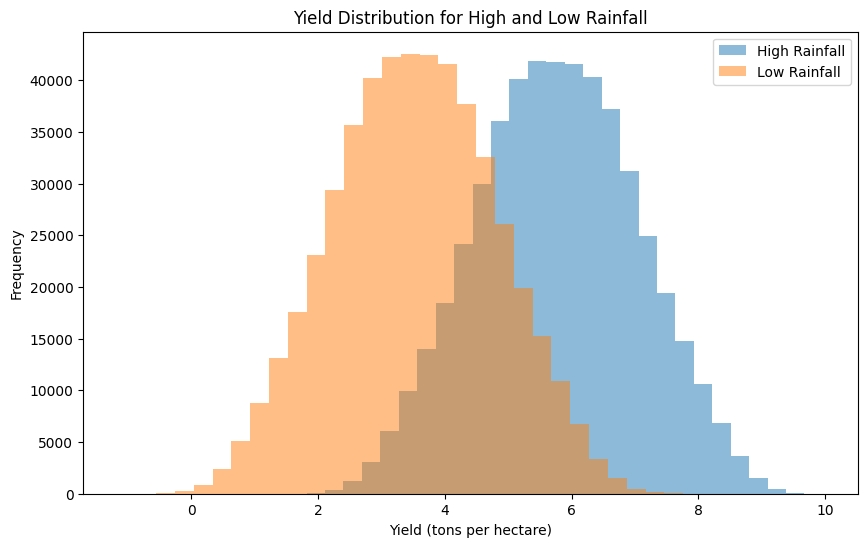

In [ ]:
# Extract relevant columns
rainfall = data['Rainfall_mm']
yield_per_hectare = data['Yield_tons_per_hectare']

# Define a threshold to separate high and low rainfall groups
rainfall_threshold = np.median(rainfall)

# Create a new column to indicate high or low rainfall
data['Rainfall_Group'] = np.where(rainfall > rainfall_threshold, 'High', 'Low')

# Separate data into high and low rainfall groups
high_rainfall_data = data[data['Rainfall_Group'] == 'High']
low_rainfall_data = data[data['Rainfall_Group'] == 'Low']

# Extract yields for high and low rainfall groups
high_rainfall_yield = high_rainfall_data['Yield_tons_per_hectare']
low_rainfall_yield = low_rainfall_data['Yield_tons_per_hectare']

# Perform a t-test to compare the means of the two groups
t_stat, p_value = stats.ttest_ind(high_rainfall_yield, low_rainfall_yield)

# Set significance level
alpha = 0.05

# Print hypothesis test conclusion
hypothesis_1 = "Higher Rainfall_mm is associated with higher Yield_tons_per_hectare."

print("\nHypothesis: " + hypothesis_1)

if t_stat > 0 and p_value < alpha:
    print("\nConclusion: Reject the null hypothesis (H₀). Higher rainfall is significantly associated with higher yield.")
else:
    print("\nConclusion: Fail to reject the null hypothesis (H₀). No significant evidence that higher rainfall increases yield.")

# Print statistical summary for high and low rainfall groups
print("\nStatistical Summary:")
print(f"High Rainfall Group (n={len(high_rainfall_yield)}):")
print(f"Mean Yield: {np.mean(high_rainfall_yield):.2f} tons/hectare")
print(f"Standard Deviation: {np.std(high_rainfall_yield):.2f} tons/hectare")

print(f"\nLow Rainfall Group (n={len(low_rainfall_yield)}):")
print(f"Mean Yield: {np.mean(low_rainfall_yield):.2f} tons/hectare")
print(f"Standard Deviation: {np.std(low_rainfall_yield):.2f} tons/hectare")

# Plotting the distributions of yields for high and low rainfall groups
plt.figure(figsize=(10, 6))
plt.hist(high_rainfall_yield, bins=30, alpha=0.5, label='High Rainfall')
plt.hist(low_rainfall_yield, bins=30, alpha=0.5, label='Low Rainfall')
plt.xlabel('Yield (tons per hectare)')
plt.ylabel('Frequency')
plt.title('Yield Distribution for High and Low Rainfall')
plt.legend()
plt.show()

# **Hypothesis 2: The use of fertilizers leads to a significant increase in crop yield.**
hypothesis_2 = Fertilizer_Used has a higher Yield_tons_per_hectare compared to when it is not used.

**Null Hypothesis (H0):**
There is no significant difference in crop yield (Yield_tons_per_hectare) between fields where fertilizers are used and those where they are not.

**Alternative Hypothesis (H1):**
There is a significant difference in crop yield (Yield_tons_per_hectare) between fields where fertilizers are used and those where they are not.

In [ ]:
from scipy.stats import ttest_ind

# Split data into two groups: with and without fertilizers
fertilizer_yes = data[data['Fertilizer_Used'] == 1]['Yield_tons_per_hectare'] # 1 = fertilizers used
fertilizer_no = data[data['Fertilizer_Used'] == 0]['Yield_tons_per_hectare'] #2 = fertilizers not used

# Perform independent t-test
t_stat, p_value = ttest_ind(fertilizer_yes, fertilizer_no, equal_var=False)  # Use t-test to handle unequal variances

# Set significance level
alpha = 0.05

# Print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Hypothesis testing
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis (H₀). Fertilizer use leads to a significant difference in crop yield.")
else:
    print("\nConclusion: Fail to reject the null hypothesis (H₀). No significant evidence that fertilizer use affects crop yield.")

T-statistic: 492.8824551463192
P-value: 0.0

Conclusion: Reject the null hypothesis (H₀). Fertilizer use leads to a significant difference in crop yield.


### **Hypothesis Explanation**
**1. T-statistic (492.88):** The t-statistic measures the size of the difference between the average crop yields for fields with and without fertilizer. A very large t-statistic, like 492.88, indicates a highly significant difference between the two groups.

**2. P-value (0.0):** The p-value is effectively 0, which is much smaller than the significance level of 0.05. This confirms that the observed difference in crop yields is statistically significant and unlikely to be due to random variation.

**Conclusion:**

The data strongly supports the hypothesis that using fertilizer significantly increases crop yields. The results demonstrate a clear and meaningful difference in yield between fields where fertilizer is applied and those where it is not, highlighting the effectiveness of fertilizer use in boosting agricultural productivity.

# **Hypothesis 3: Temperature impacts the number of days to harvest.**
hypothesis_3 = Higher Temperature_Celsius is correlated with a shorter Days_to_Harvest.

**Null Hypothesis (H0):**
There is no significant linear relationship between temperature (Temperature_Celsius) and the number of days to harvest (Days_to_Harvest).

**Alternative Hypothesis (H1):**
There is a significant linear relationship between temperature (Temperature_Celsius) and the number of days to harvest (Days_to_Harvest).

In [ ]:
# Extract the relevant columns
temperature = data['Temperature_Celsius']
days_to_harvest = data['Days_to_Harvest']

# Calculate the correlation coefficient manually
mean_temp = np.mean(temperature)
mean_days = np.mean(days_to_harvest)

numerator = np.sum((temperature - mean_temp) * (days_to_harvest - mean_days))
denominator = np.sqrt(np.sum((temperature - mean_temp)**2) * np.sum((days_to_harvest - mean_days)**2))
correlation = numerator / denominator

# Perform a permutation test to calculate the p-value
np.random.seed(42)  # For reproducibility
n_permutations = 10000
perm_correlations = []

for _ in range(n_permutations):
    shuffled_days = np.random.permutation(days_to_harvest)
    perm_numerator = np.sum((temperature - mean_temp) * (shuffled_days - mean_days))
    perm_correlation = perm_numerator / denominator
    perm_correlations.append(perm_correlation)

# Calculate the p-value
perm_correlations = np.array(perm_correlations)
p_value = np.mean(np.abs(perm_correlations) >= np.abs(correlation))

# Set the significance level
alpha = 0.05

# Print the results
print(f"Correlation: {correlation}")
print(f"P-value: {p_value}")

# Hypothesis testing
if p_value < alpha:
    print("\nConclusion: There is a significant relationship between temperature and days to harvest.")
    if correlation < 0:
        print("Higher temperatures are associated with shorter days to harvest.")
    else:
        print("Higher temperatures are associated with longer days to harvest.")
else:
    print("\nConclusion: There is no significant relationship between temperature and days to harvest.")

Correlation: -0.0007309826941273156
P-value: 0.4593

Conclusion: There is no significant relationship between temperature and days to harvest.


**Hypothesis Explanation**:

**1. Correlation (-0.0007):** The correlation value is -0.0007, which is extremely close to 0. This indicates that there is no meaningful relationship between temperature and the number of days to harvest.

**2. P-value (0.4593):** The p-value is 0.4593, which is much greater than 0.05. This means the result is not statistically significant, and any small correlation observed is likely due to random chance.

**Conclusion:**

The data does not support the hypothesis that temperature significantly impacts the number of days to harvest. There appears to be no meaningful connection between these two variables based on this analysis.

## **Correlation Matrix**

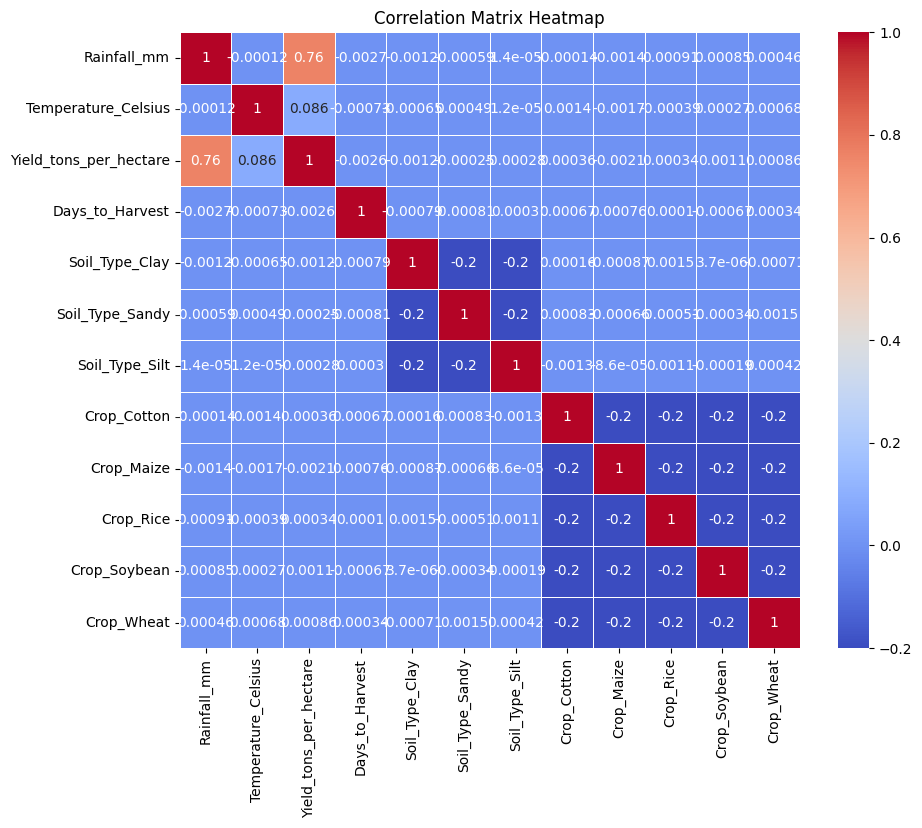

In [27]:
# Select only numerical columns
numerical_data = data[['Rainfall_mm', 'Temperature_Celsius', 'Yield_tons_per_hectare', 'Days_to_Harvest', 'Soil_Type_Clay', 'Soil_Type_Sandy', 'Soil_Type_Silt', 'Crop_Cotton', 'Crop_Maize', 'Crop_Rice', 'Crop_Soybean', 'Crop_Wheat']]

# Calculate the correlation matrix
corr_matrix = numerical_data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)  # Create the heatmap
plt.title('Correlation Matrix Heatmap')  # Add a title to the plot
plt.show()  # Display the plot

## **Feature Engineering**

## **Feature Selection using Chi-Square Test (Filter Method)**

Selected features using Chi2: Index(['Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used',
       'Irrigation_Used', 'Days_to_Harvest'],
      dtype='object')


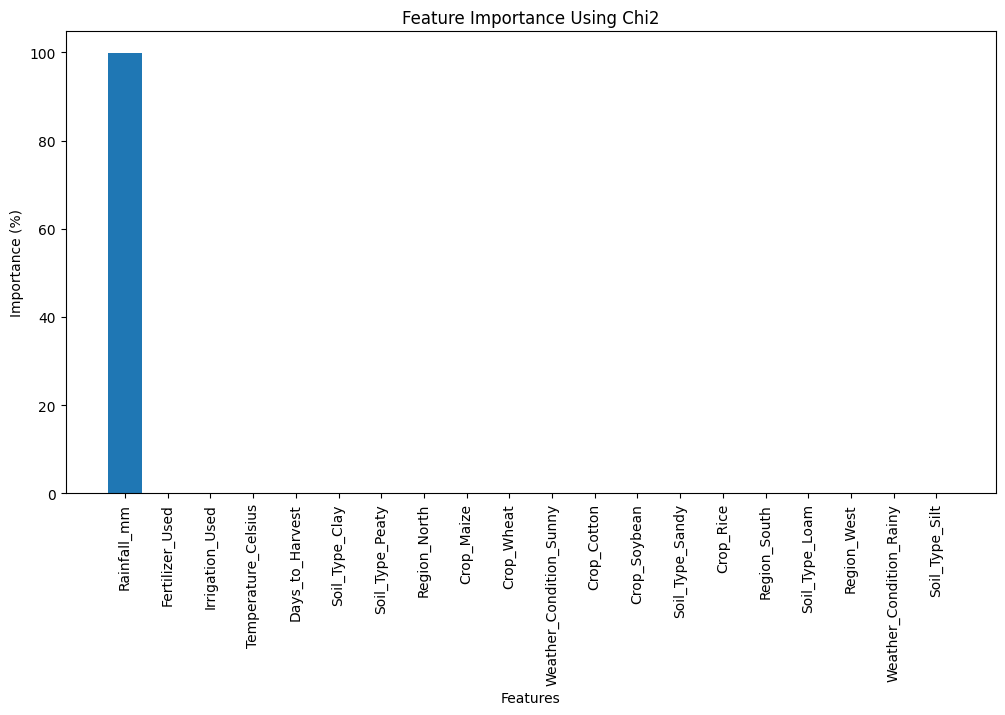

In [9]:
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2
# Chi2 Feature Selection
# Ensure all features are non-negative (Chi2 requires non-negative values)
X_non_negative = X.apply(lambda x: x.clip(lower=0))

# Bin the target variable into discrete categories
y_binned = pd.qcut(y, q=5, labels=False)

# Apply Chi2 feature selection
chi2_selector = SelectKBest(score_func=chi2, k=5)
X_kbest = chi2_selector.fit_transform(X_non_negative, y_binned)

# Get the selected feature names
selected_features_chi2 = X_non_negative.columns[chi2_selector.get_support()]
print("Selected features using Chi2:", selected_features_chi2)

# Plot Chi2 feature importances
chi2_scores = chi2_selector.scores_
chi2_scores_percentage = (chi2_scores / np.sum(chi2_scores)) * 100

plt.figure(figsize=(12, 6))
chi2_indices = np.argsort(chi2_scores_percentage)[::-1]
plt.bar(range(len(feature_names)), chi2_scores_percentage[chi2_indices], align='center')
plt.xticks(range(len(feature_names)), feature_names[chi2_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance (%)")
plt.title("Feature Importance Using Chi2")
plt.show()


## **Embedded Method**

Selected features using Random Forest: Index(['Rainfall_mm', 'Fertilizer_Used', 'Irrigation_Used'], dtype='object')


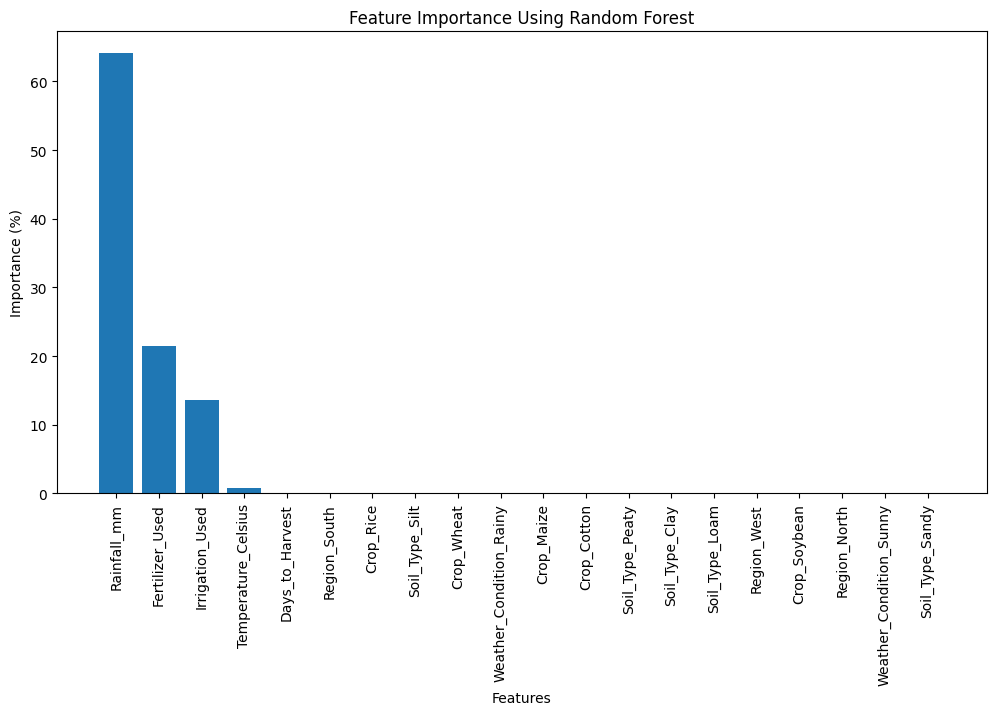

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Convert categorical columns to numeric values
data = pd.get_dummies(data, drop_first=True)

# Separate features and target variable
X = data.drop('Yield_tons_per_hectare', axis=1)
y = data['Yield_tons_per_hectare']

# Initialize the Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=42, n_jobs=-1)

# Fit the model
rfr.fit(X, y)

# Get feature importances
importances = rfr.feature_importances_
feature_names = X.columns

# Convert importances to percentages
importances_percentage = (importances / np.sum(importances)) * 100

# Select features based on importance
selector = SelectFromModel(estimator=rfr, threshold='mean', prefit=True)
selected_features_rf = X.columns[selector.get_support()]
print("Selected features using Random Forest:", selected_features_rf)

# Plot feature importances
plt.figure(figsize=(12, 6))
indices = np.argsort(importances_percentage)[::-1]
plt.bar(range(len(feature_names)), importances_percentage[indices], align='center')
plt.xticks(range(len(feature_names)), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance (%)")
plt.title("Feature Importance Using Random Forest")
plt.show()

## **Wrapper Method(Forward Selection)**

Selected features using Forward Selection: Index(['Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used',
       'Irrigation_Used', 'Soil_Type_Silt'],
      dtype='object')
Best feature using Forward Selection: Rainfall_mm


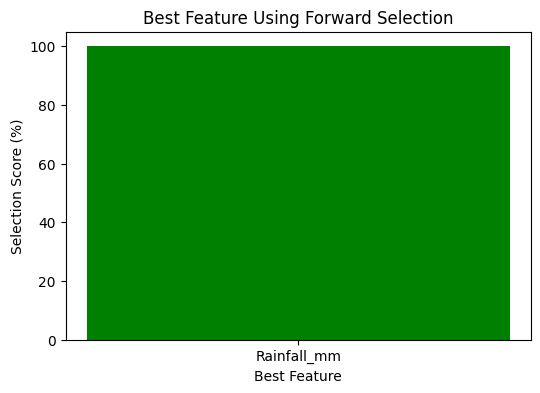

In [14]:
# Wrapper Method: Forward Selection
# Initialize Linear Regression model
lr = LinearRegression()

# Perform forward selection using Sequential Feature Selector
sfs = SequentialFeatureSelector(lr, n_features_to_select=5, direction='forward')
sfs.fit(X_train, y_train)

# Get the selected features
selected_features_forward = X.columns[sfs.get_support()]
print("Selected features using Forward Selection:", selected_features_forward)

# Keep track of the best-performing feature
best_feature_forward = selected_features_forward[0]
print("Best feature using Forward Selection:", best_feature_forward)

# Plot the best feature only
plt.figure(figsize=(6, 4))
plt.bar(best_feature_forward, 100, color='green', align='center')
plt.xlabel("Best Feature")
plt.ylabel("Selection Score (%)")
plt.title("Best Feature Using Forward Selection")
plt.show()
